## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
Clinical_results_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
#Display dataframe
Clinical_results_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
print(Clinical_results_df['Mouse ID'].nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedata = Clinical_results_df[Clinical_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicatedmice = duplicatedata["Mouse ID"].unique()[0]
#show what the duplicate mouse is
print(f'The Mouse ID that had duplicated times is {duplicatedmice}')

The Mouse ID that had duplicated times is g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Cleaning the duplicated data
Cleaned_Clinical = Clinical_results_df[(Clinical_results_df['Mouse ID'] != "g989")]
#displaying the cleaned data
Cleaned_Clinical.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
Cleaned_Clinical.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#creating the average tumor volume per drug regimen
regimenavg = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#creating the median tumor volume per drug regimen
regimenmed = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#creating the varance of the tumor volume per drug regimen
regimenvar = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#creating the standard deviation for the tumor volume per drug regimen
regimenstd = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#creating the SEM for tumor volume per drug regimen
regimensem = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#creating a DataFrame for the created statistical values for each regimen
regimenstats_df = pd.DataFrame({'Average Tumor Volume':regimenavg, 
                               'Tumor Volume Median':regimenmed, 
                               'Tumor Volume Variance':regimenvar,
                               'Tumor Volume Standard Deviation': regimenstd,
                               'Tumor Volume SEM': regimensem
                                }
                              )
#display above said dataframe                              
regimenstats_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Average Tumor Volume,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#recreating the above table with the aggs function
aggs = ['mean','median','var','std','sem']
regimenstats_single_df = pd.DataFrame(Cleaned_Clinical.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':aggs}))
                      
regimenstats_single_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

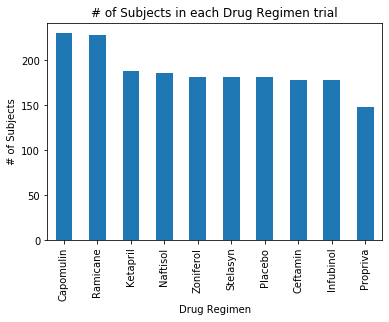

In [9]:
## Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#finding the number of participants for each regimen
counts = Cleaned_Clinical['Drug Regimen'].value_counts()
#creating bar chart with pandas and formatting the table
counts.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel("# of Subjects")
plt.title('# of Subjects in each Drug Regimen trial')
plt.show()



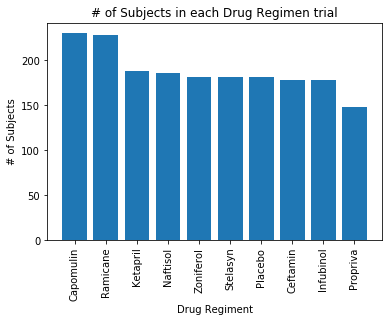

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#creating above table with matplotlib and formatting
plt.bar(counts.index.values,counts.values)
plt.xlabel('Drug Regiment')
plt.ylabel('# of Subjects')
plt.title('# of Subjects in each Drug Regimen trial')
plt.xticks(rotation=90)
plt.show()

## Pie Plots

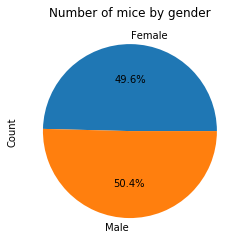

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#creating a pie chart with pandas and formatting
Sex_df = Cleaned_Clinical.groupby('Sex').nunique()
Sex_df.columns = ['Count', 'Timepoint','Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
Sex_df = Sex_df['Count']
plt.title('Number of mice by gender')
piechart = Sex_df.plot.pie(autopct='%1.1f%%')


Text(0.5, 1.0, 'Number of mice by gender')

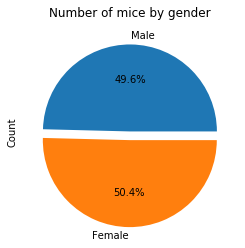

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#creating pie plot with matplotlib and formatting
explode =[0,.1]
labels = "Male", "Female"
plt.pie(Sex_df, labels=labels, explode=explode, autopct='%1.1f%%')
plt.ylabel('Count')
plt.title('Number of mice by gender')

## Quartiles, Outliers and Boxplots

In [18]:
### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#finding the last timepoint for each mouse id
finalTimepoint = Cleaned_Clinical.groupby(['Mouse ID'])['Timepoint'].max()
#creating dataframe from above groupby of final timepoint for each mouse
finalTimepoint = pd.DataFrame(finalTimepoint)
#merge with original data set into new final timepoint for each mouse dataframe
finalTumorVolumeDF = finalTimepoint.merge(Cleaned_Clinical, how='left', on=['Mouse ID','Timepoint'])

#Filter out subjects that were on Capomulin
Capomulin_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Capomulin']
Capomulin_df=Capomulin_df.reset_index(drop=True)
#finding quartiles
quartilesCap = Capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#specificing lower quartile
lowerqCap = quartilesCap[.25]
#specificing upper quartile
upperqCap = quartilesCap[.75]
#calc the iqr
iqrCap = upperqCap-lowerqCap
#calc the lower bound
low_boundCap = lowerqCap - (iqrCap*1.5)
#calc the upper bound
high_boundCap = upperqCap + (iqrCap*1.5)
#filteringer to see if there are any lower outliers
loweroutliersCap = Capomulin_df.loc[Capomulin_df['Tumor Volume (mm3)'] <= low_boundCap]
#filtering to see if there are any upper outliers
upperoutliersCap = Capomulin_df.loc[Capomulin_df['Tumor Volume (mm3)'] >= high_boundCap]
#join outliers to one list
outliersCap = pd.concat([upperoutliersCap, loweroutliersCap])
#count the total number of outliers
outlierframesCap = len(outliersCap)


#Filter out subjects that were on Ramican
Ramicane_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Ramicane']
Ramicane_df=Ramicane_df.reset_index(drop=True)
#finding quartiles
quartilesRam = Ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#specificing lower quartile
lowerqRam = quartilesRam[.25]
#specificing upper quartile
upperqRam = quartilesRam[.75]
#calc the iqr
iqrRam = upperqRam-lowerqRam
#calc the lower bound
low_boundRam = lowerqRam - (iqrRam*1.5)
#calc the upper bound
high_boundRam = upperqRam + (iqrRam*1.5)
#filteringer to see if there are any lower outliers
loweroutliersRam = Ramicane_df.loc[Ramicane_df['Tumor Volume (mm3)'] <= low_boundRam]
#filtering to see if there are any upper outliers
upperoutliersRam = Ramicane_df.loc[Ramicane_df['Tumor Volume (mm3)'] >= high_boundRam]
#join outliers to one list
outliersRam = pd.concat([upperoutliersRam, loweroutliersRam])
#count the total number of outliers
outlierframesRam = len(outliersRam)


#Filter out subjects that were on Infubinol
Infubinol_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Infubinol']
Infubinol_df=Infubinol_df.reset_index(drop=True)
#finding quartiles
quartilesInf = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#specificing lower quartile
lowerqInf = quartilesInf[.25]
#specificing upper quartile
upperqInf = quartilesInf[.75]
#calc the iqr
iqrInf = upperqInf-lowerqInf
#calc the lower bound
low_boundInf = lowerqInf - (iqrInf*1.5)
#calc the upper bound
high_boundInf = upperqInf + (iqrInf*1.5)
#filteringer to see if there are any lower outliers
loweroutliersInf = Infubinol_df.loc[Infubinol_df['Tumor Volume (mm3)'] <= low_boundInf]
#filtering to see if there are any upper outliers
upperoutliersInf = Infubinol_df.loc[Infubinol_df['Tumor Volume (mm3)'] >= high_boundInf]
#join outliers to one list
outliersInf = pd.concat([upperoutliersInf, loweroutliersInf])
#count the total number of outliers
outlierframesInf = len(outliersInf)


#Filter out subjects that were on Ceftamin
Ceftamin_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Ceftamin']
Ceftamin_df=Ceftamin_df.reset_index(drop=True)
#finding quartiles
quartilesCef = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#specificing lower quartile
lowerqCef = quartilesCef[.25]
#specificing upper quartile
upperqCef = quartilesCef[.75]
#calc the iqr
iqrCef = upperqCef-lowerqCef
#calc the lower bound
low_boundCef = lowerqCef - (iqrCef*1.5)
#calc the upper bound
high_boundCef = upperqCef + (iqrCef*1.5)
#filteringer to see if there are any lower outliers
loweroutliersCef = Ceftamin_df.loc[Ceftamin_df['Tumor Volume (mm3)'] <= low_boundCef]
#filtering to see if there are any upper outliers
upperoutliersCef = Ceftamin_df.loc[Ceftamin_df['Tumor Volume (mm3)'] >= high_boundCef]
#join outliers to one list
outliersCef = pd.concat([upperoutliersCef, loweroutliersCef])
#count the total number of outliers
outlierframesCef = len(outliersCef)

#create dataframe for the 4 filtered drug regimens
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
Success_df = pd.concat(frames)
Success_df

#Create dataframe from the calculated stats info
overallstats_df = pd.DataFrame({'Regimen':['Capomulin', 'Ramicane','Infubinol','Ceftamin'],
                'lower quartile':  [lowerqCap, lowerqRam, lowerqInf, lowerqCef],
                'upper quartile': [upperqCap, upperqRam, upperqInf, upperqCef],
                'iqr':[iqrCap, iqrRam, iqrInf, iqrCef],
                'lower bound':[low_boundCap, low_boundRam, low_boundInf, low_boundCef],
                'upper bound':[high_boundCap, high_boundRam, high_boundInf, high_boundCef]
               })
#Print to check if ther are any outliers
print(f"There are {outlierframesCap} outliers in the Capomulin trial: {outliersCap['Mouse ID'].to_numpy()}")
print(f"There are {outlierframesRam} outliers in the Ramicane trial: {outliersRam['Mouse ID'].to_numpy()}")
print(f"There are {outlierframesInf} outliers in the Infubinol trial: {outliersInf['Mouse ID'].to_numpy()[0]}")
print(f"There are {outlierframesCef} outliers in the Ceftamin trial: {outliersCef['Mouse ID'].to_numpy()}")

#print the stats dataframe that was created
overallstats


There are 0 outliers in the Capomulin trial: []
There are 0 outliers in the Ramicane trial: []
There are 1 outliers in the Infubinol trial: c326
There are 0 outliers in the Ceftamin trial: []


NameError: name 'overallstats' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#creating a data series of the 4 regimens and tumor volumes
data = [Capomulin_df['Tumor Volume (mm3)'], Ramicane_df['Tumor Volume (mm3)'], Infubinol_df['Tumor Volume (mm3)'], Ceftamin_df['Tumor Volume (mm3)']]
#creating xtick labels
trials=('','Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
#creating xticks
x = np.arange(5)
#creating formatting for outliers
blueoutliers = dict(markerfacecolor='b', marker='d')
#creating subplot figure
fig1, ax = plt.subplots()
#creating boxplots, and specifing the outlier formatting
ax.boxplot(data,flierprops=blueoutliers)
#table formatting
plt.xlabel('Trials Medicine')
plt.ylabel('Final tumor size(mm)')
plt.title('BoxPlots of Final Tumor Size by Trial')
#adding x labels
plt.xticks(x,trials)


plt.show()

# Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#filtering for Capomulin regimen
Capomulin = Clinical_results_df[(Clinical_results_df['Drug Regimen'] == "Capomulin")]
#filtering out for specific mouse
Capomulinj246 = Capomulin[(Capomulin['Mouse ID'] == "j246")]
#creating a filtered dataframe to contain the info for plotting
Capomulinline = Capomulinj246[['Timepoint', 'Tumor Volume (mm3)']]
Capomulinline = Capomulinline.reset_index(drop = True)
#creating x variable
x_values = Capomulinline['Timepoint']
#creating y variable
y_values = Capomulinline['Tumor Volume (mm3)']
#creating line plot
plt.plot(x_values, y_values)
#formatting for plot
plt.xlabel('Trial Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size for mouse j246 Throughout the Trial')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#calc the average tumor size for each mouse id in the Capomulin trial
Capavgtumor = pd.DataFrame(Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
#the the meadian weight(the mouses weight since it weights the same for every time period) for every mouse ID in the trial
weight = Capomulin.groupby('Mouse ID')['Weight (g)'].median()
#add weight to above created dataframe
Capavgtumor['Weight'] = weight
Capavgtumor = Capavgtumor.reset_index()
#set x variable
x=Capavgtumor['Weight']
#set y variable
y=Capavgtumor['Tumor Volume (mm3)']
#create scatter plot
plt.scatter(x,y,color='green')
#format scatter plot
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title('Mouse Weight vs. Avg. Tumor Size')
plt.grid()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#compute line regression for above scatter plot
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
#greating line regression formula
regress_values = x * slope + intercept
#creating the equation string to print
line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
#creating scatterplot
plt.scatter(x,y, color='green')
#adding regression line for plot to graph
plt.plot(x,regress_values,"r-")
#adding line regression string to graph
plt.annotate(line_eq,(22,38),fontsize=15, color='red')
#additional formatting/labeling
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title('Mouse Weight vs. Avg. Tumor Size')
plt.grid()
plt.show()